# Checkpoint 2 - EDA

In [12]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
import os, numpy, scipy, statistics, matplotlib.pyplot as plt, IPython.display as ipd
from IPython.display import Audio
import pandas as pd
from scipy.stats import mode
import json
import IPython.display as ipd

In [18]:
def load(indir=None,outdir=None): 
    songs = os.listdir(indir)
    y_array = []
    sr_array = []
    song_name = []
    for i in songs:
        if '.DS_Store' in i: 
            continue
        y, sr = librosa.load(indir+'/'+ i)
        y_array.append(y)
        sr_array.append(sr)
        song_name.append(i)
    
    
    df = pd.DataFrame({'Name': song_name,
                       'y': y_array,
                       'sr': sr_array})
    #df.to_csv(os.path.join(outdir,r'loaded_data.csv',index=False))
    #df.to_json(os.path.join(outdir,r'loaded_data.txt'))
    
    return df

In [6]:
loaded = load('data/raw','data')

/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [19]:
def compute_pitch(chromagram):
    total_occurences_above_8 = []
    notes = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']

    for i in chromagram: 
        count = 0
        for j in i: 
            if j >=0.7: 
                count+=1
        total_occurences_above_8.append(count)
        
    df = pd.DataFrame({'occurences above 0.8':total_occurences_above_8,'notes':notes})
    df = df.sort_values('occurences above 0.8',ascending=False)
    pitch = df.iloc[0]['notes']
        
    return pitch

In [20]:
def return_main_notes(chromagram):
    total_occurences_above_8 = []
    notes = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']

    for i in chromagram: 
        count = 0
        for j in i: 
            if j >=0.7: 
                count+=1
        total_occurences_above_8.append(count)
        
    df = pd.DataFrame({'occurences above 0.8':total_occurences_above_8,'notes':notes})
    df = df.sort_values('occurences above 0.8',ascending=False)
    pitch = df['notes'][0:9]
        
    return pitch

In [ ]:
#get main 8 notes of each 2 min clip
#store the main 8 notes of each 2 min clip in a dictionary/list 
#average these for each rag
#make a histogram for that rag

#for spectogram: 

#show one spectogram for each rag (whichever is most representative of that rag )

We want to get the note that is being played at each second. if there are multiple notes being played in a one second interval, we want to get the most played note/the one played the longest
after we have a note for each second, we want to do bigram/trigram analysis. we are constraining our data to the most played note per second to reduce noise and to lessen the chance of our function picking up extraneous noise and thinking they are notes.

In [35]:
def get_clean_data(df):
    dfdict = {'songs': [], 'y': [], 'sr': []}
    fmin = librosa.midi_to_hz(36)
    hop_length = 512
    
    audio = list(df['Name'])
    ys = np.asarray(list(df['y']))
    srs = list(df['sr'])
    
    pitchdict = {'Asavari Natabhairavi 1': 'C#', 'Asavari Natabhairavi 2': 'D',
                 'Asavari Natabhairavi 3': 'D',
               'Bhairav Mayamalavagowlai 1': 'C#', 'Bhairav Mayamalavagowlai 2': 'C', 
               'Bhairav Mayamalavagowlai 3': 'C#', 'Bhairavi Hanumatodi 1': 'D',
               'Bhairavi Hanumatodi 2': 'C', 'Bhairavi Hanumatodi 3': 'D#',
               'Bilawal Dheerashankarabharanam 1': 'D', 'Bilawal Dheerashankarabharanam 2': 'D#',
               'Bilawal Dheerashankarabharanam 3': 'E', 'Kafi Karaharapriya 1': 'D',
               'Kafi Karaharapriya 2': 'D', 'Kafi Karaharapriya 3': 'D#',
               "Kalyan Kalyani 1": 'E', "Kalyan Kalyani 2": 'D#', 'Kalyan Kalyani 3': 'D#',
               'Khamaj Harikambhoji 1': 'D', 'Khamaj Harikambhoji 2': 'E', 'Khamaj Harikambhoji 3': 'E',
               'Marva Gamanasharma 1': 'C', 'Marva Gamanasharma 2': 'E', 'Marva Gamanasharma 3': 'D',
               'Poorvi Kamavardhani 1': 'C#', 'Poorvi Kamavardhani 2': 'C#', 'Poorvi Kamavardhani 3': 'C#',
               'Todi Subhapantuvarali 1': 'C', 'Todi Subhapantuvarali 2': 'C#', 'Todi Subhapantuvarali 3': 'D'}
    
    #iterate through input dict
    for i in range(len(df)):
        y = ys[i]
        sr = srs[i]
        
        #check pitch of each input
        #chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=hop_length)
        
        pitch = pitchdict[audio[i][:-4]]
        
        if pitch == 'C':
            continue
        elif pitch == 'C#':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=-1)
        elif pitch == 'D':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=-2)
        elif pitch == 'D#':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=-3)
        elif pitch == 'E':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=-4)
        elif pitch == 'F':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=-5)
        elif pitch == 'F#':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=-6)
        elif pitch == 'G':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=-7)
        elif pitch == 'G#':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=+4)
        elif pitch == 'A':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=+3)
        elif pitch == 'A#':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=+2)
        elif pitch == 'B':
            newy = librosa.effects.pitch_shift(y, sr, n_steps=+1)
        
        y = newy  
        ylist = []
        first = 0
        second = 1000000
        while second < len(y):
            ylist.append(y[first:second])
            first = second
            second = second + 1000000
            
        cliptitles = []
        
        for j in range(len(ylist)):
            string = audio[i][:-6]
            cliptitles.append(string)
            
        for k in range(len(cliptitles)):
            dfdict['songs'].append(cliptitles[k])
            dfdict['y'].append(ylist[k])

            dfdict['sr'].append(sr)
            
    newdf = pd.DataFrame(dfdict)
    
    return newdf

In [ ]:
def clean_data(indir = None, outdir = None):

    if outdir and not os.path.exists(outdir):
        os.makedirs(outdir)
    df = pd.read_pickle('data/loaded_data.pkl')  
    cleaned = get_clean_data(df)
   
    cleaned.to_pickle(os.path.join(outdir,r'cleaned_data.pkl'))
    
    return cleaned

In [ ]:
x = clean_data(indir='data', outdir='data')

In [ ]:
pd.read_pickle('data/cleaned_data.pkl')

In [ ]:
#trim audio 
#ask about sr to twomey 

# EDA

In [43]:
def average_dist(df):
    y_list = df['y'] #ys for every clip
    sr_list = df['sr']
    hop_length = 512
    notes = {'C': [],'C#': [],'D': [],'D#': [],'E': [],'F': [],'F#': [],'G': [],'G#': [],'A': [],'A#': [],'B': []}
    
    #goes through all clips
    for i in range(len(y_list)): 
        chromagram = librosa.feature.chroma_stft(y = y_list[i], sr=sr_list[i], hop_length=hop_length)
        
        notecount = 0 #total number of notes we are getting from clip
        counts = [] #final length should be 12
        
        #goes through each of 12 arrays (notes) in chromagram 
        for note in range(len(chromagram)): 
            count = 0 #count for specific note in clip
            
            #goes through each note array in chromagram 
            for j in chromagram[note]:
                
                #minimum "loudness" that would qualify as a correct note
                if j >=0.9:
                    
                    #add to count of specific note in clip
                    count+=1
                    
                    #add to count of total notes in clip
                    notecount += 1
            counts.append(count)
        
        #going through counts of each note in clip
        for j in range(len(counts)):
            counts[j] = counts[j]/notecount
        
        #going through global note count dictionary
        for n in range(len(notes)):
            note = list(notes)
            #adds each note's frequency in this clip to global dictionary
            notes[note[n]].append(counts[n])
            
    for note in notes:
        #takes average frequency for each note
        notes[note] = np.mean(notes[note])
        
        
    notedf = pd.DataFrame.from_dict(notes, orient = 'index')
    return notedf

def EDA(songs): 
    #input should be list of x songs
    #songs = [song1, song2, song3]
    y_array = []
    sr_array = []
    song_name = []
    for i in songs:
        if '.DS_Store' in i: 
            continue
        y,sr = librosa.load('test_data_raw/'+ i)
        y_array.append(y)
        sr_array.append(sr)
        song_name.append(i)

    df = pd.DataFrame({'Name': song_name,
                       'y': y_array,
                       'sr': sr_array})
    
    cleaned_df = get_clean_data(df)
    
    histogram_df = average_dist(cleaned_df)
    
    plot = histogram_df.sort_values(by=[0])[:7].sort_index().rename(columns={0:'Notes'}).plot(kind = 'bar', title = songs[0][:-6])
    plot.set_xlabel("Notes")
    plot.set_ylabel("Frequency")
    
    return [plot,histogram_df]

# Bilawal

/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


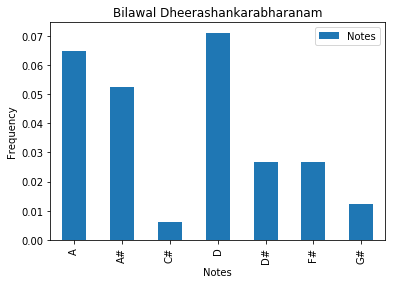

In [44]:
bilawal = EDA(['Bilawal Dheerashankarabharanam 1.mp3','Bilawal Dheerashankarabharanam 2.mp3',
             'Bilawal Dheerashankarabharanam 3.mp3'])

In [55]:
bilawal[0]

# Khamaj

/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


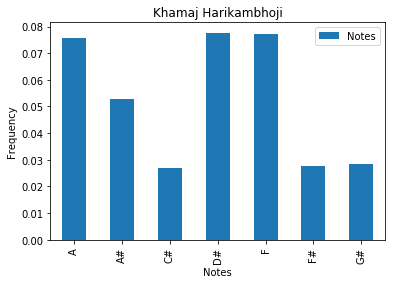

In [7]:
khamaj = EDA(['Khamaj Harikambhoji 1.mp3','Khamaj Harikambhoji 2.mp3',
             'Khamaj Harikambhoji 3.mp3'])

# Kafi

/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


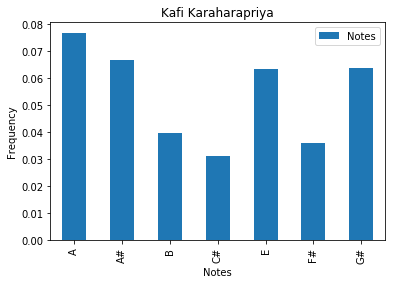

In [11]:
kafi = EDA(['Kafi Karaharapriya 1.mp3','Kafi Karaharapriya 2.mp3','Kafi Karaharapriya 3.mp3'])

# Asavari 

/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


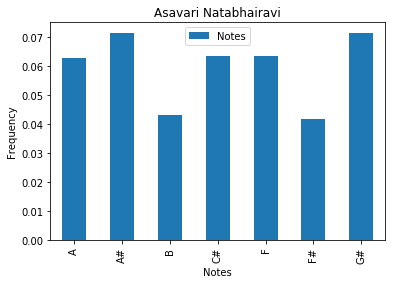

In [15]:
asavari = EDA(['Asavari Natabhairavi 1.mp3','Asavari Natabhairavi 2.mp3','Asavari Natabhairavi 3.mp3'])

# Bhairavi 

/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


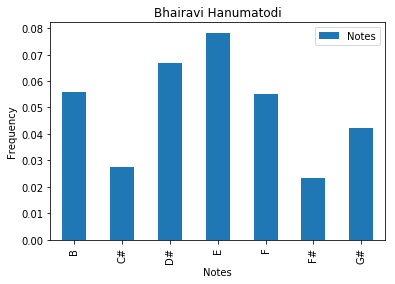

In [16]:
bhairavi = EDA(['Bhairavi Hanumatodi 1.mp3','Bhairavi Hanumatodi 2.mp3','Bhairavi Hanumatodi 3.mp3'])

In [10]:
#TRIGRAM BIGRAM

In [11]:
def extract_ngrams(chromagram, num):
    seq_notes = []
    max_val = []
    for row in chromagram.T:
        seq_notes.append(np.argmax(row))
        max_val.append(np.max(row))
    all_notes = pd.Series(seq_notes).apply(numtonote)

    values = []
    for i in range(0, len(all_notes),22):
        curr = all_notes[i:i+22]
        values.append(mode(curr)[0][0])
    #print(values)

    newvals = []
    for i in range(len(values)):
        if i != 0 and values[i] == values[i-1]:
            continue
        else:
            newvals.append(values[i])
    #print(newvals)
        
    
    n_grams = ngrams(newvals, num)
    fdist = nltk.FreqDist(n_grams)
    ngramlist = []
    counts = []
    for k,v in fdist.items():
        ngramlist.append(k)
        counts.append(v)
    clipdict = {ngramlist[i]: counts[i] for i in range(len(ngramlist))}

    return clipdict

In [29]:
from scipy.stats import mode
import nltk 
from nltk.util import ngrams

def numtonote(num):
    if num == 0:
        return 'C'
    if num == 1:
        return 'C#'
    if num == 2:
        return 'D'
    if num == 3:
        return 'D#'
    if num == 4:
        return 'E'
    if num == 5:
        return 'F'
    if num == 6:
        return 'F#'
    if num == 7:
        return 'G'
    if num == 8:
        return 'G#'
    if num == 9:
        return 'A'
    if num == 10:
        return 'A#'
    if num == 11:
        return 'B'


def create_ngrams(songs):
    y_array = []
    sr_array = []
    song_name = []
    for i in songs:
        if '.DS_Store' in i: 
            continue
        y,sr = librosa.load('test_data_raw/'+ i)
        y_array.append(y)
        sr_array.append(sr)
        song_name.append(i)

    df = pd.DataFrame({'Name': song_name,
                       'y': y_array,
                       'sr': sr_array})
    
    cleaned_df = get_clean_data(df)
    #gives us df of clip title (raga name), y, sr
    
    y_list = cleaned_df['y']
    sr_list = cleaned_df['sr']
    
    ragabigrams = {}
    ragatrigrams = {}
    
    for i in range(len(y_list)):
        chromagram = librosa.feature.chroma_stft(y = y_list[i], sr=sr_list[i], hop_length=512)
        if i == 2: 
            plt.figure(figsize=(17, 5))
            librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')
            
        
        #helper function return
        bigramdict = extract_ngrams(chromagram,2)
        for key in bigramdict:
            if key in ragabigrams:
                ragabigrams[key] += bigramdict[key]
                
            else:
                ragabigrams[key] = bigramdict[key]
                
                bigramdict = extract_ngrams(chromagram,2)
        
        trigramdict = extract_ngrams(chromagram,3)
        for key in trigramdict:
            if key in ragatrigrams:
                ragatrigrams[key] += trigramdict[key]
                
            else:
                ragatrigrams[key] = trigramdict[key]
        
        
    #bdf = pd.DataFrame(ragabigrams)
    #tdf = pd.DataFrame(ragatrigrams)
    
    bdf = pd.DataFrame({'Bigrams': list(ragabigrams.keys()), 'Counts': list(ragabigrams.values())})
    plot = bdf.sort_values(by = 'Counts', ascending = False)[:10].plot(kind = 'bar', x= 'Bigrams', y = 'Counts', title = songs[0][:-6]) 
    plot.set_xlabel("Bigrams")
    plot.set_ylabel("Counts")
    
    tdf = pd.DataFrame({'Trigrams': list(ragatrigrams.keys()), 'Counts': list(ragatrigrams.values())})
    plot2 = tdf.sort_values(by = 'Counts', ascending = False)[:10].plot(kind = 'bar', x= 'Trigrams', y = 'Counts', title = songs[0][:-6]) 
    plot2.set_xlabel("Trigrams")
    plot2.set_ylabel("Counts")
    
    
    
    return ipd.Audio(y_list[2],rate=sr_list[2])
def extract_ngrams(chromagram, num):
    seq_notes = []
    max_val = []
    for row in chromagram.T:
        seq_notes.append(np.argmax(row))
        max_val.append(np.max(row))
    all_notes = pd.Series(seq_notes).apply(numtonote)

    values = []
    for i in range(0, len(all_notes),22):
        curr = all_notes[i:i+22]
        values.append(mode(curr)[0][0])
    #print(values)

    newvals = []
    for i in range(len(values)):
        if i != 0 and values[i] == values[i-1]:
            continue
        else:
            newvals.append(values[i])
    #print(newvals)
        
    
    n_grams = ngrams(newvals, num)
    fdist = nltk.FreqDist(n_grams)
    ngramlist = []
    counts = []
    for k,v in fdist.items():
        ngramlist.append(k)
        counts.append(v)
    clipdict = {ngramlist[i]: counts[i] for i in range(len(ngramlist))}

    return clipdict

/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


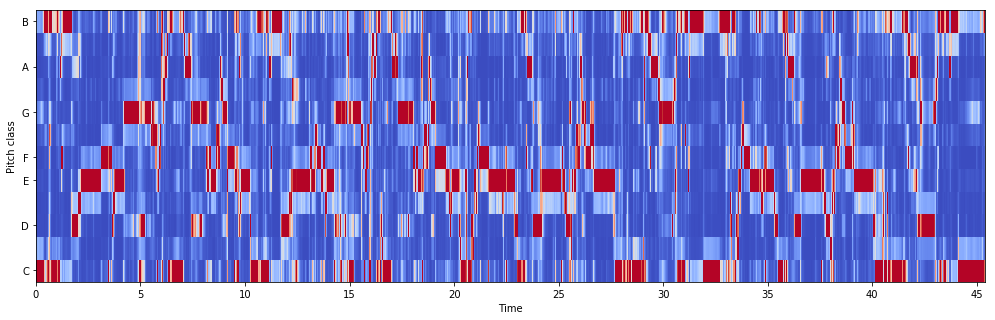

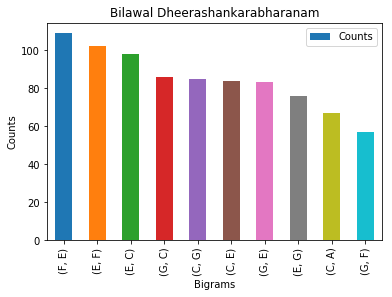

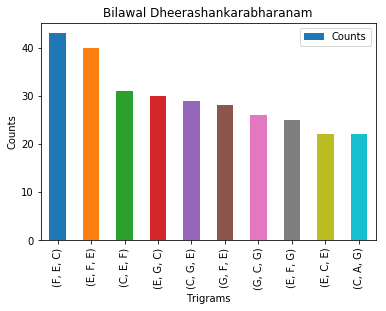

In [25]:
bilawal_ngrams = create_ngrams(['Bilawal Dheerashankarabharanam 1.mp3','Bilawal Dheerashankarabharanam 2.mp3',
                               'Bilawal Dheerashankarabharanam 3.mp3'])

/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


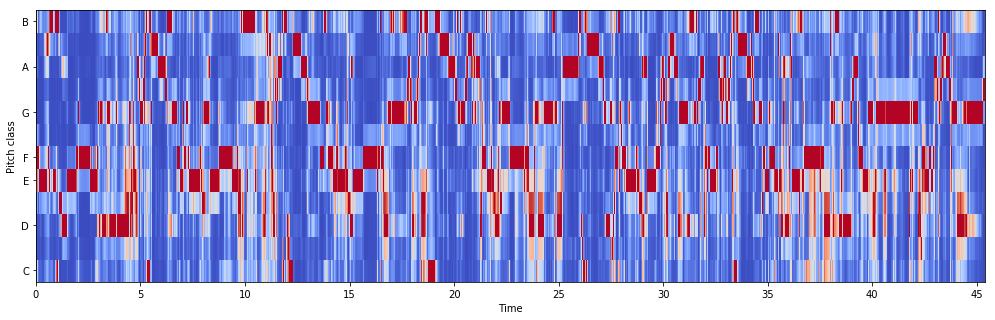

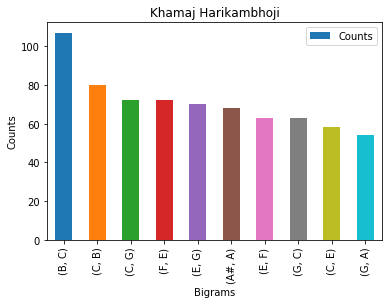

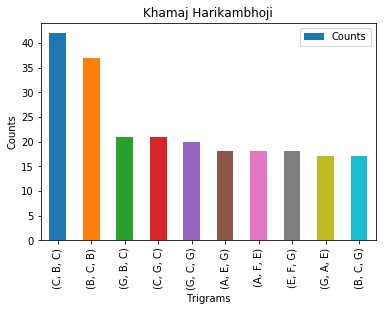

In [26]:
khamaj_ngrams = create_ngrams(['Khamaj Harikambhoji 1.mp3','Khamaj Harikambhoji 2.mp3',
                               'Khamaj Harikambhoji 3.mp3'])

/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


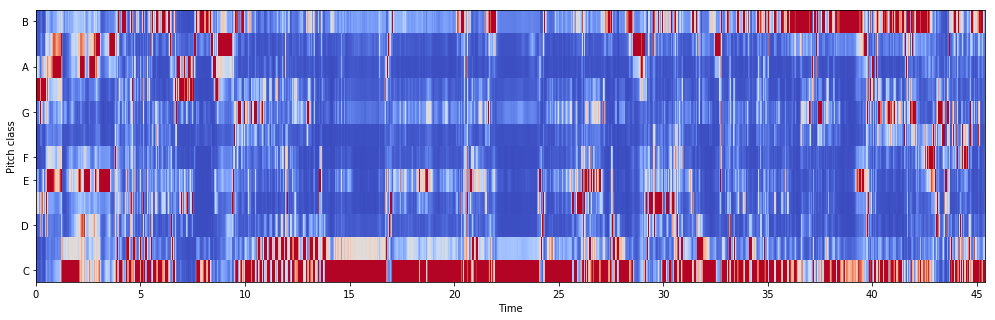

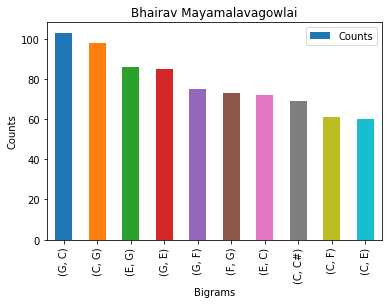

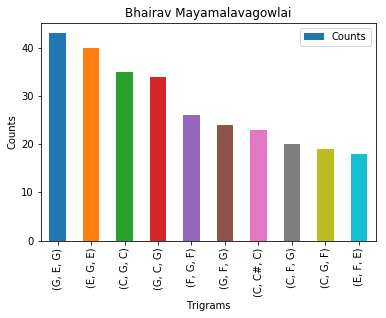

In [27]:
bhairav_ngrams = create_ngrams(['Bhairav Mayamalavagowlai 1.mp3','Bhairav Mayamalavagowlai 2.mp3',
                               'Bhairav Mayamalavagowlai 3.mp3'])

/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


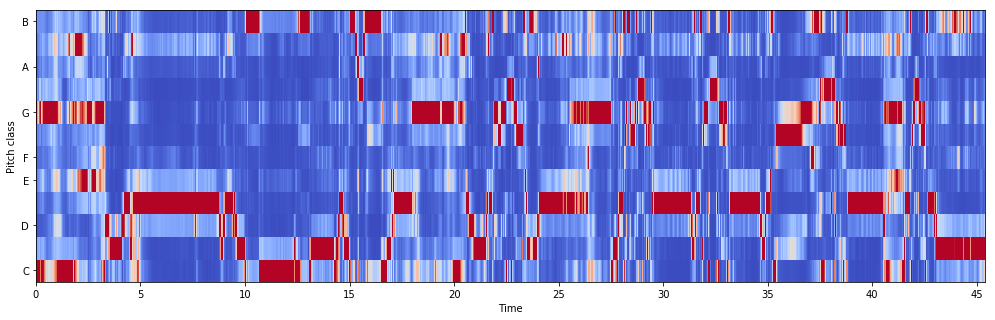

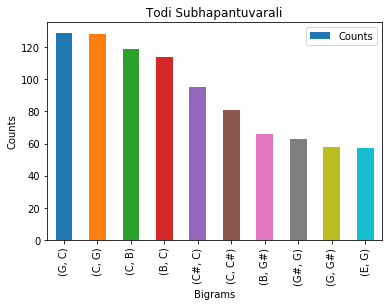

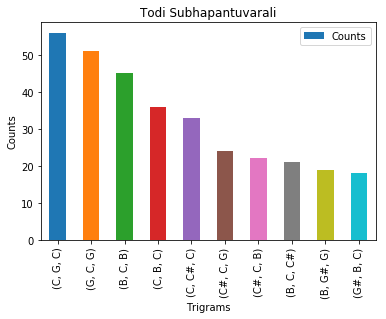

In [32]:
todi_ngrams = create_ngrams(['Todi Subhapantuvarali 1.mp3',
                            'Todi Subhapantuvarali 2.mp3',
                            'Todi Subhapantuvarali 3.mp3'])

/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


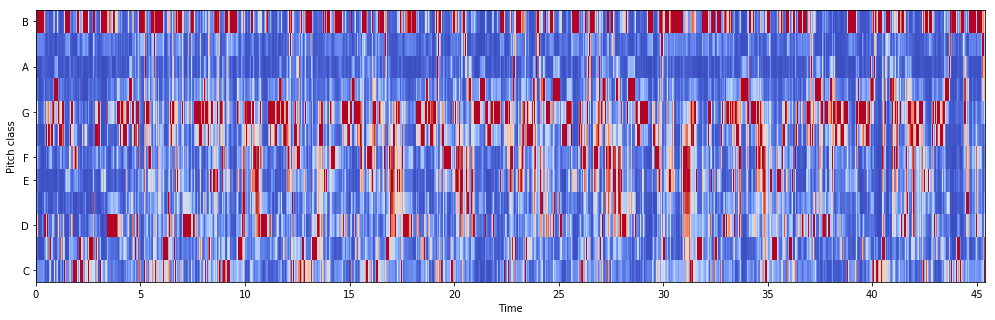

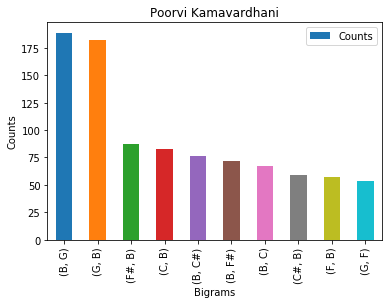

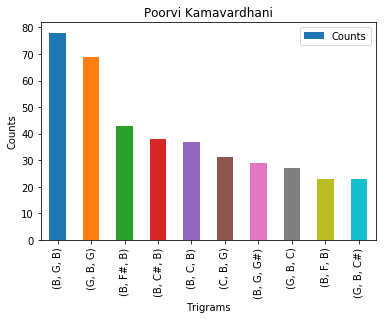

In [33]:
poorvi_ngrams = create_ngrams(['Poorvi Kamavardhani 1.mp3',
                            'Poorvi Kamavardhani 2.mp3',
                            'Poorvi Kamavardhani 3.mp3'])

/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


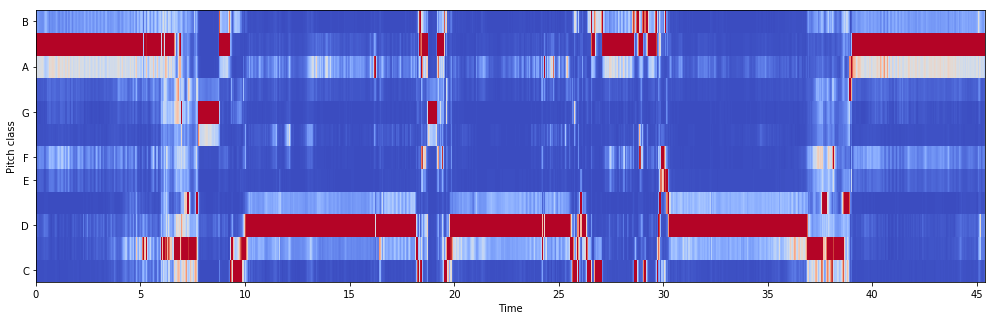

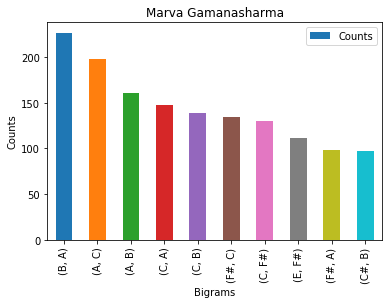

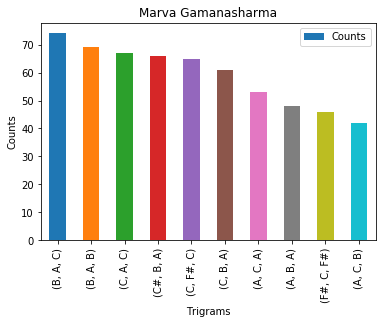

In [36]:
marwa_ngrams = create_ngrams(['Marva Gamanasharma 1.mp3',
                            'Marva Gamanasharma 2.mp3',
                            'Marva Gamanasharma 3.mp3'])

/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


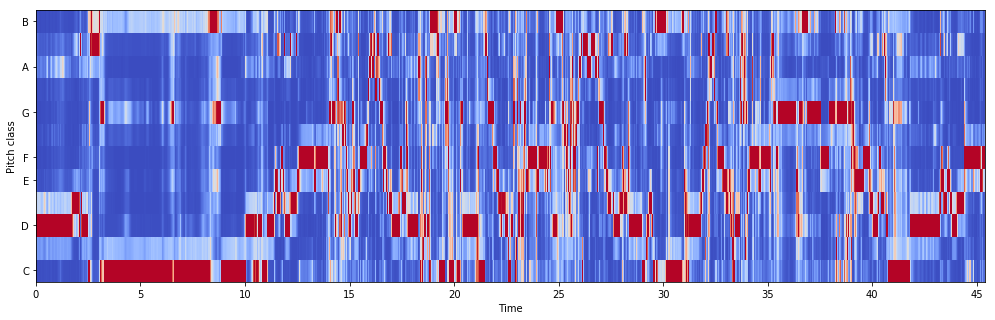

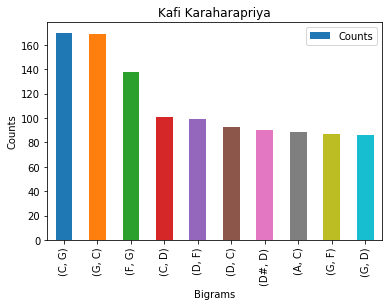

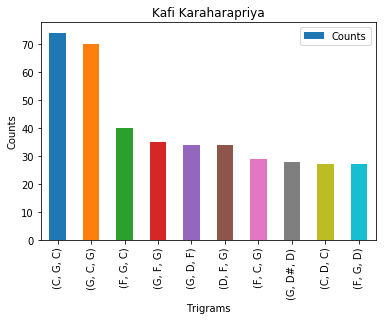

In [56]:
kafi_ngrams = create_ngrams(['Kafi Karaharapriya 1.mp3',
                            'Kafi Karaharapriya 2.mp3',
                            'Kafi Karaharapriya 3.mp3'])

/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


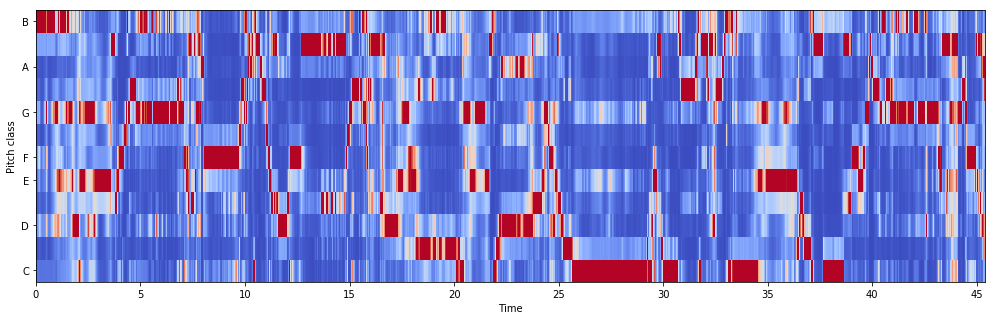

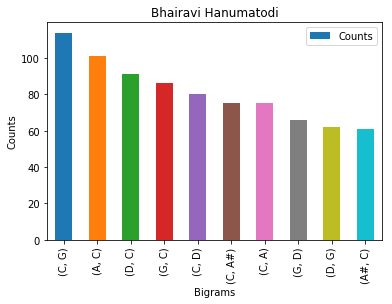

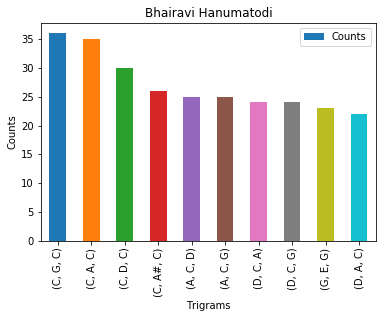

In [57]:
bhairavi_ngrams = create_ngrams(['Bhairavi Hanumatodi 1.mp3',
                            'Bhairavi Hanumatodi 2.mp3',
                            'Bhairavi Hanumatodi 3.mp3'])

/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


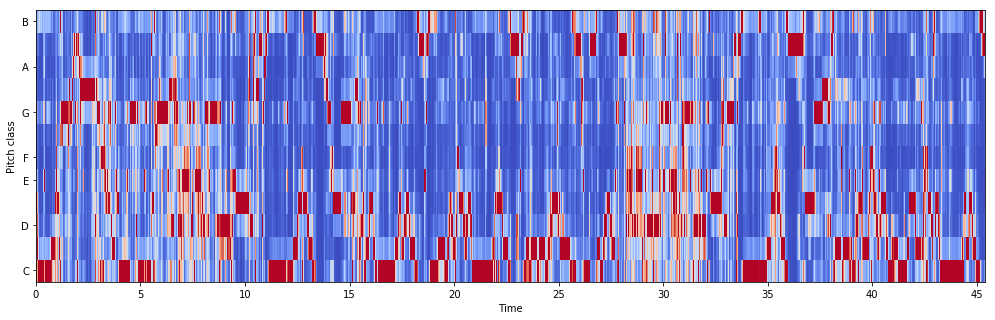

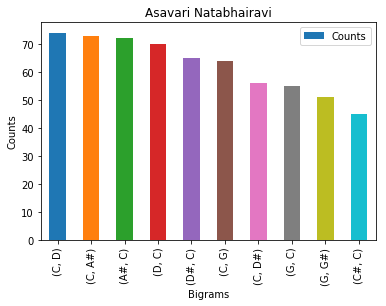

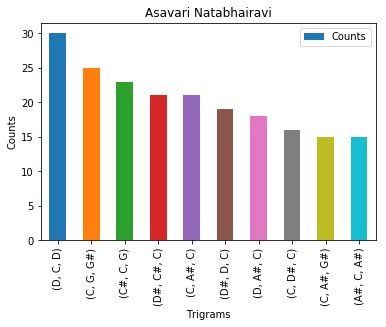

In [58]:
asavari_ngrams = create_ngrams(['Asavari Natabhairavi 1.mp3',
                            'Asavari Natabhairavi 2.mp3',
                            'Asavari Natabhairavi 3.mp3'])

/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


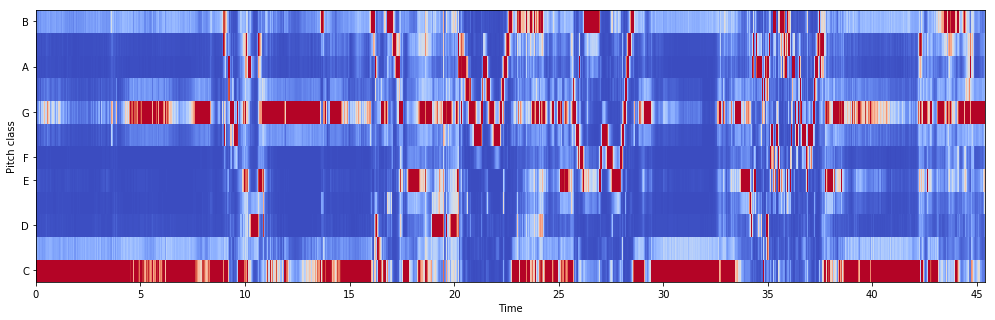

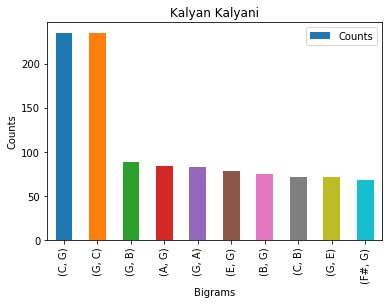

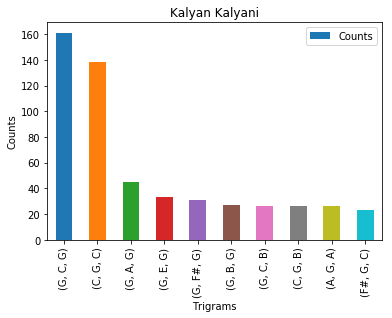

In [59]:
kalyani_ngrams = create_ngrams(['Kalyan Kalyani 1.mp3',
                            'Kalyan Kalyani 2.mp3',
                            'Kalyan Kalyani 3.mp3'])

In [8]:
from library import *

In [11]:
frequency_plot_generator(['test_data_raw/Bhairav Mayamalavagowlai 1.mp3'])

NameError: name 'librosa' is not defined